# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Vedant Anil Pawar

**PRN:** 202201040094

**Group Members**:

Sarthak Dumbare (202201040038)

Darshan Ramagade (202201070044)


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

**Dataset Link:**  https://www.kaggle.com/datasets/parulpandey/emotion-dataset

In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load dataset from CSV
df = pd.read_csv("/content/test.csv")

In [ ]:
# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Convert text to lowercase
df["text"] = df["text"].str.lower()


In [ ]:
# Tokenization
nltk.download('punkt_tab')
df["tokens"] = df["text"].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
df["tokens"] = df["tokens"].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
# Stemming
stemmer = PorterStemmer()
df["stemmed"] = df["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df["lemmatized"] = df["tokens"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [ ]:
# Convert back to string
df["processed_text"] = df["lemmatized"].apply(lambda x: " ".join(x))

In [ ]:
# Vectorization
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["processed_text"])
y = df["label"]

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Naïve Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       124
           1       0.51      0.99      0.67       131
           2       0.00      0.00      0.00        35
           3       1.00      0.04      0.07        52
           4       1.00      0.07      0.13        43
           5       0.00      0.00      0.00        15

    accuracy                           0.57       400
   macro avg       0.53      0.31      0.26       400
weighted avg       0.61      0.57      0.46       400



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


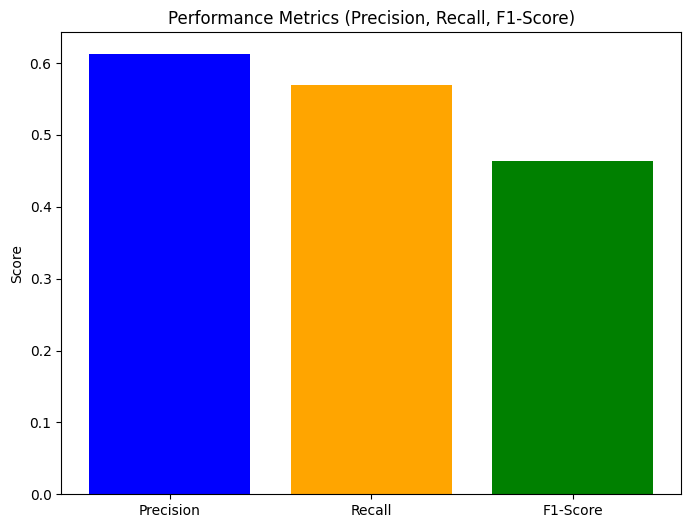

In [ ]:
# Additional visualization for precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot these metrics
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

# Plot the bar chart
plt.figure(figsize=(8,6))
plt.bar(metrics, values, color=['blue', 'orange', 'green'])
plt.title("Performance Metrics (Precision, Recall, F1-Score)")
plt.ylabel("Score")
plt.show()


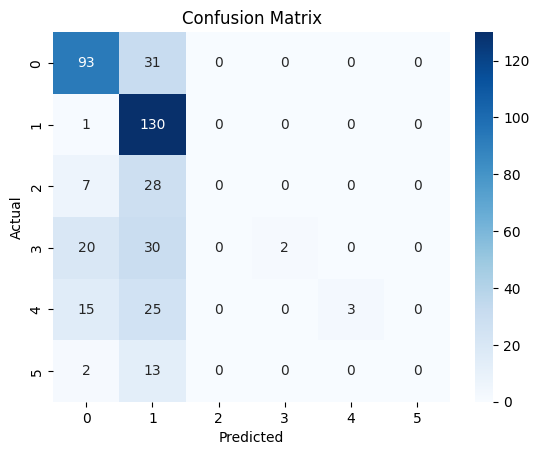

Model training and evaluation complete.


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Model training and evaluation complete.")